In [3]:
import cPickle, gzip
import numpy as np

# Load the dataset
f = open('mnist.pkl', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

In [4]:
train_data, train_target = train_set
test_data, test_target = test_set

In [5]:
test_data = test_data[:100]
test_target = test_target[:100]

from keras.models import Sequential
model = Sequential()
from keras.layers.core import Dense, Activation

model.add(Dense(output_dim=1000, input_dim=784))
model.add(Activation("relu"))
#model.add(Dense(output_dim=1000, input_dim=1000))
#model.add(Activation("relu"))
model.add(Dense(output_dim=10))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.add(Activation("softmax"))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
model = Sequential()
model.add(Dense(1000, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
model.compile(loss='mse', optimizer='sgd')

transform the one dimensional input to the 10 dimension softmax expectation

In [6]:
train_target_10 = np.zeros((train_target.shape[0], 10))
test_target_10 = np.zeros((test_target.shape[0], 10))
for number in range(10):
    train_target_10[np.where(train_target==number),number] = 1
    test_target_10[np.where(test_target==number),number] = 1

In [ ]:
n=46
print train_target[n],train_target_10[n]

In [7]:
model.fit(train_data, train_target_10, nb_epoch=2, batch_size=100, verbose=0)

In [8]:
p=model.predict(test_data)
p_cat = np.argmax(p,axis=1)
print "Fraction of good prediction"
print len(np.where( p_cat == test_target)[0])
print len(np.where( p_cat == test_target )[0])/float(len(p_cat)),"%"

Fraction of good prediction
33
0.33 %


visualize the neural net (does not work, I have install a few things)

In [6]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Couldn't import dot_parser, loading of dot files will not be possible.


NameError: name 'model' is not defined

## Convolutional Layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution2D, Flatten, MaxPooling2D
model = Sequential()
#model.add(Convolution1D(64, 3, border_mode='same', input_shape=(10, 32)))
model.add(Convolution2D(10, 5, 5, input_shape = (1, 28, 28), activation='relu'))
#(pool_length=2, stride=None, border_mode='valid')
print(model.output_shape)
model.add(MaxPooling2D())
model.summary()
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

#model.add(Dense(1000, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='mse', optimizer='sgd')

In [ ]:
train_target_10 = np.zeros((train_target.shape[0], 10))
test_target_10 = np.zeros((test_target.shape[0], 10))
for number in range(10):
    train_target_10[np.where(train_target==number),number] = 1
    test_target_10[np.where(test_target==number),number] = 1

In [ ]:
n=46
print train_target[n],train_target_10[n]

In [9]:
train_data_2d = train_data.reshape((train_data.shape[0], 1, 28, 28))

In [10]:
train_data.shape

(50000, 784)

In [11]:
model.fit(train_data_2d, train_target_10, nb_epoch=10, batch_size=100, verbose=0)

NameError: name 'model' is not defined

In [12]:
p=model.predict(test_data.reshape(test_data.shape[0], 1, 28, 28))
p_cat = np.argmax(p,axis=1)
print "Fraction of good prediction"
print len(np.where( p_cat == test_target)[0])
print len(np.where( p_cat == test_target)[0])/float(len(p_cat)),"%"

NameError: name 'model' is not defined

In [13]:
model.summary()

NameError: name 'model' is not defined

In [27]:
from keras.utils.visualize_util import plot
#plot(model, to_file='model.png')
%matplotlib inline
import matplotlib.pyplot as plt

In [28]:
test_data_2d = test_data.reshape((test_data.shape[0], 1, 28, 28))

In [29]:
overlap_image = (test_data_2d[1]*.7 + test_data_2d[3]*.3)

In [33]:
test_target[1]

2

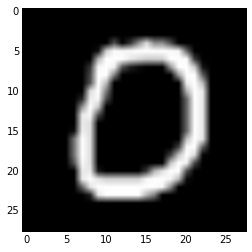

In [50]:
plt.imshow(test_data[10].reshape((28,28)),cmap='Greys_r')

In [19]:
mix=model.predict(overlap_image.reshape((1,1,28,28)))

NameError: name 'model' is not defined

In [ ]:
mix

In [ ]:
c=model.layers[0]

In [ ]:
for i in range(10):
    plt.imshow(c.get_weights()[0][i][0],cmap='Greys_r')
    plt.show()

In [ ]:
len(c.get_weights())

In [ ]:
#from IPython.display import Image
#Image("model.png")

In [7]:
import numpy as np
from scipy.ndimage.interpolation import shift

xs = np.array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])


shift(xs, 3, cval=0)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.66533454e-16,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
         6.00000000e+00])

In [20]:
overlap_image = (test_data_2d[1]*.7 + test_data_2d[3]*.3)


In [21]:
a2 = test_data_2d[1]
shift2=np.zeros((1,28,28))

In [22]:
shift2[0,0:24,0:23] = a2[0,4:,5:]

In [23]:
plt.imshow(shift2.reshape(28,28),cmap='Greys_r')

NameError: name 'plt' is not defined

In [ ]:
overlap_image_2 = (shift2*.5 + test_data_2d[3]*.5)

In [25]:
plt.imshow(test_data_2d[3].reshape(28,28),cmap='Greys_r')

NameError: name 'plt' is not defined

In [ ]:
mix=model.predict(test_data_2d[3].reshape((1,1,28,28)))

In [ ]:
mix